# AIML MODULE PROJECT-UNSUPERVISED LEARNING

### PART A: 30 Marks

### * DOMAIN: 
Automobile
### * CONTEXT: 
The data concerns city-cycle fuel consumption in miles per gallon to be predicted in terms of 3 multivalued discrete and 5
continuous attributes.
### DATA DESCRIPTION:
cylinders: multi-valued discrete 
acceleration: continuous
displacement: continuous 
model year: multi-valued discrete
horsepower: continuous 
origin: multi-valued discrete
weight: continuous 
car name: string (unique for each instance)
mpg: continuous

### * PROJECT OBJECTIVE:
To understand K-means Clustering by applying on the Car Dataset to segment the cars into various categories.

#### Import Libraries

In [1]:
#Loading the required packages
import numpy as np 
from sklearn.linear_model import LinearRegression
from scipy import stats 
from scipy.stats import zscore
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd    
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split



### Data Understanding & Exploration:

In [2]:
car_df1=pd.read_csv("Car_name.csv")
car_df1.shape

(398, 1)

car_df1 contains 398 datapoints, 1 feature

In [3]:
car_df1.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


In [4]:
car_df1.dtypes

car_name    object
dtype: object

In [55]:
car_df1.isnull().sum()

car_name    0
dtype: int64

No null values present in car_df1 dataframe

In [56]:
import json
 
# Opening JSON file
f = open('Car-Attributes.json')
#loading json file into list
list1 = json.load(f)

In [57]:
list1

[{'mpg': 18,
  'cyl': 8,
  'disp': 307,
  'hp': 130,
  'wt': 3504,
  'acc': 12,
  'yr': 70,
  'origin': 1},
 {'mpg': 15,
  'cyl': 8,
  'disp': 350,
  'hp': 165,
  'wt': 3693,
  'acc': 11.5,
  'yr': 70,
  'origin': 1},
 {'mpg': 18,
  'cyl': 8,
  'disp': 318,
  'hp': 150,
  'wt': 3436,
  'acc': 11,
  'yr': 70,
  'origin': 1},
 {'mpg': 16,
  'cyl': 8,
  'disp': 304,
  'hp': 150,
  'wt': 3433,
  'acc': 12,
  'yr': 70,
  'origin': 1},
 {'mpg': 17,
  'cyl': 8,
  'disp': 302,
  'hp': 140,
  'wt': 3449,
  'acc': 10.5,
  'yr': 70,
  'origin': 1},
 {'mpg': 15,
  'cyl': 8,
  'disp': 429,
  'hp': 198,
  'wt': 4341,
  'acc': 10,
  'yr': 70,
  'origin': 1},
 {'mpg': 14,
  'cyl': 8,
  'disp': 454,
  'hp': 220,
  'wt': 4354,
  'acc': 9,
  'yr': 70,
  'origin': 1},
 {'mpg': 14,
  'cyl': 8,
  'disp': 440,
  'hp': 215,
  'wt': 4312,
  'acc': 8.5,
  'yr': 70,
  'origin': 1},
 {'mpg': 14,
  'cyl': 8,
  'disp': 455,
  'hp': 225,
  'wt': 4425,
  'acc': 10,
  'yr': 70,
  'origin': 1},
 {'mpg': 15,
  'cyl': 8,

In [58]:
#converting list into dataframe
car_df2=pd.DataFrame(list1)
car_df2.shape

(398, 8)

car_df2 contains 398 datapoints, 8 features

In [59]:
car_df2.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [60]:
car_df2.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

Except hp, all the attributes were continuous 

In [61]:
car_df2.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

*No null values present in car_df2 dataframe

*since no common column exist between 2 dataframes, instead of merging, we can use concatenation

In [62]:
car_df=pd.concat([car_df1, car_df2],axis=1, join='inner')
car_df


,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


After combining, the resultant dataframe has total of 398 datapoints and 9 features

In [63]:
car_df.head()

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1


Since the car name has no impact , we can drop it

In [64]:
#check for duplicates
car_df.duplicated().sum()


0

No duplicate values found in car_df dataframe

In [65]:
#dropping/ignoring car_name 
car_df = car_df.drop('car_name', axis=1)

In [66]:
# Also replacing the categorical var with actual values
car_df['origin'] = car_df['origin'].replace({1: 'america', 2: 'europe', 3: 'asia'})
car_df.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,america
1,15.0,8,350.0,165,3693,11.5,70,america
2,18.0,8,318.0,150,3436,11.0,70,america
3,16.0,8,304.0,150,3433,12.0,70,america
4,17.0,8,302.0,140,3449,10.5,70,america


In [67]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    object 
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    object 
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


Out of 8 features, all the features were having proper datatype except 'hp'. So , we need to process it

In [68]:
#5-point summary
car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0


* mean of 'mpg', 'cyl', 'acc','yr' were normally distributed with median
* mean of 'disp', 'wt' were distributed with slight skewness
* mean across different feature tend to deviate more (more variation) leads to pre-processing
* In all the cases, its found to be less variation with standard deviation


In [69]:
# isdigit()? on 'horsepower' 
hpIsDigit = pd.DataFrame(car_df.hp.str.isdigit()) 

#print isDigit = False!
car_df[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,?,2046,19.0,71,america
126,21.0,6,200.0,?,2875,17.0,74,america
330,40.9,4,85.0,?,1835,17.3,80,europe
336,23.6,4,140.0,?,2905,14.3,80,america
354,34.5,4,100.0,?,2320,15.8,81,europe
374,23.0,4,151.0,?,3035,20.5,82,america


In [70]:
# Replace missing values with NaN
car_df = car_df.replace('?', np.nan)
car_df[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin
32,25.0,4,98.0,NaN,2046,19.0,71,america
126,21.0,6,200.0,NaN,2875,17.0,74,america
330,40.9,4,85.0,NaN,1835,17.3,80,europe
336,23.6,4,140.0,NaN,2905,14.3,80,america
354,34.5,4,100.0,NaN,2320,15.8,81,europe
374,23.0,4,151.0,NaN,3035,20.5,82,america


In [71]:
#replace the missing values with median value. 
car_df.median()

mpg       23.0
cyl        4.0
disp     148.5
hp        93.5
wt      2803.5
acc       15.5
yr        76.0
dtype: float64

In [72]:
#replace hp with median
car_df['hp'].fillna((car_df['hp'].median()), inplace=True)

In [73]:
car_df.isnull().sum()

mpg       0
cyl       0
disp      0
hp        0
wt        0
acc       0
yr        0
origin    0
dtype: int64

The data set has no missing values 

In [74]:
#creating mpg_level attribute using the 25% and 75% of mpg values( <  17 as low, between 17 and 29 as medium, > 29 as high  )
car_df['mpg_level'] = car_df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')
car_df.head()


,mpg,cyl,disp,hp,wt,acc,yr,origin,mpg_level
0,18.0,8,307.0,130.0,3504,12.0,70,america,medium
1,15.0,8,350.0,165.0,3693,11.5,70,america,low
2,18.0,8,318.0,150.0,3436,11.0,70,america,medium
3,16.0,8,304.0,150.0,3433,12.0,70,america,low
4,17.0,8,302.0,140.0,3449,10.5,70,america,medium


* mpg level was categorized based on the values of 25% and 75 % values
* categorical variables like 'cyl','yr','origin','mpg_level' can be removed and retian only numeric values

In [75]:
#categorical variable
car_cat = car_df.iloc[:,[1,6,7,8]]
car_cat.head()

,cyl,yr,origin,mpg_level
0,8,70,america,medium
1,8,70,america,low
2,8,70,america,medium
3,8,70,america,low
4,8,70,america,medium


In [76]:
#dropping categorical variables
car_num=car_df.drop(['cyl','yr','origin','mpg_level'],axis=1)
car_num.head()

,mpg,disp,hp,wt,acc
0,18.0,307.0,130.0,3504,12.0
1,15.0,350.0,165.0,3693,11.5
2,18.0,318.0,150.0,3436,11.0
3,16.0,304.0,150.0,3433,12.0
4,17.0,302.0,140.0,3449,10.5


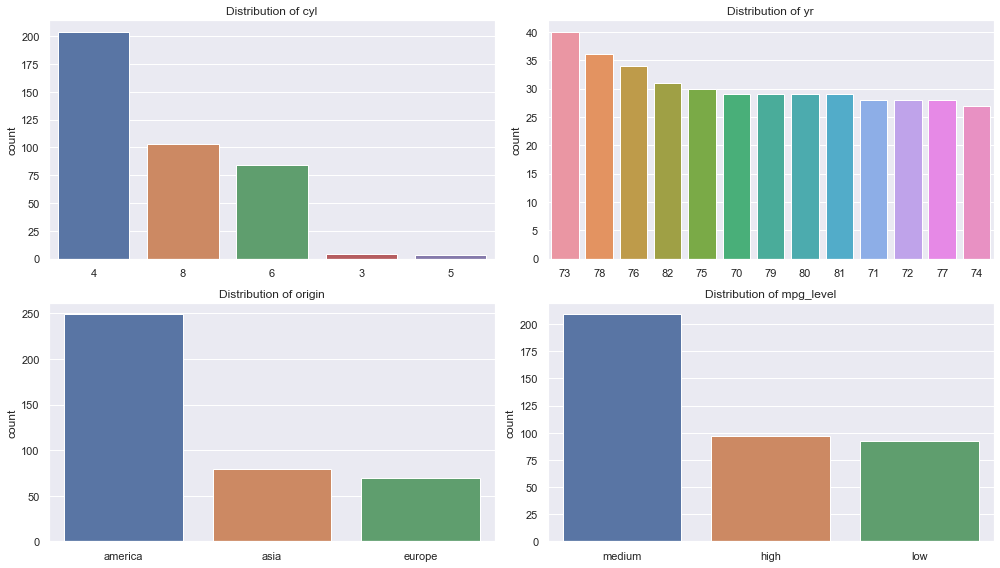

In [77]:
#plotting categorical variables
fig = plt.figure(1, (14, 8))

for i,car in enumerate(car_cat.columns):
    ax = plt.subplot(2,2,i+1)
    sns.countplot(car_cat[car], order=car_cat[car].value_counts().index)
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {car}')
    plt.tight_layout()

plt.show()

* American 4 cylinder cars produced in 1973 with medium mpg level seem to dominate the dataset

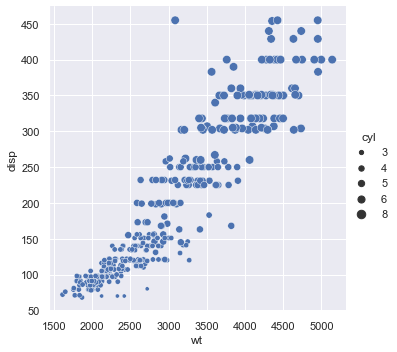

In [78]:
# Create scatter plot of wt vs. disp
sns.relplot(x='wt', y='disp', data=car_df, size='cyl', kind='scatter');

* Cars with higher weight tend to get a higher number of displacement. 
* They also tend to have a higher number of cylinders.

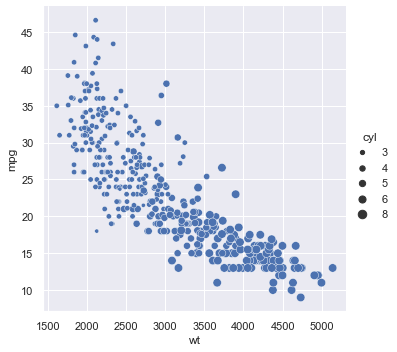

In [79]:
# Create scatter plot of wt vs. mpg
sns.relplot(x='wt', y='mpg', data=car_df, size='cyl', kind='scatter');

* Cars with higher weight tend to get a lower number of miles per gallon. 
* They also tend to have a higher number of cylinders.

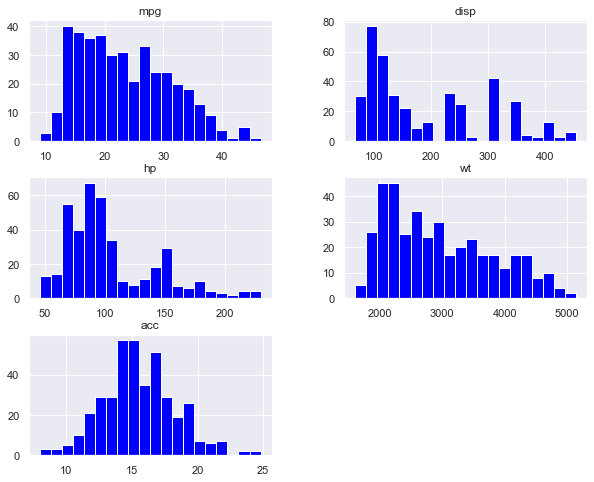

In [80]:
#plot histograms
car_num.hist(bins = 20, figsize = (10, 8), color = 'blue')
plt.show()

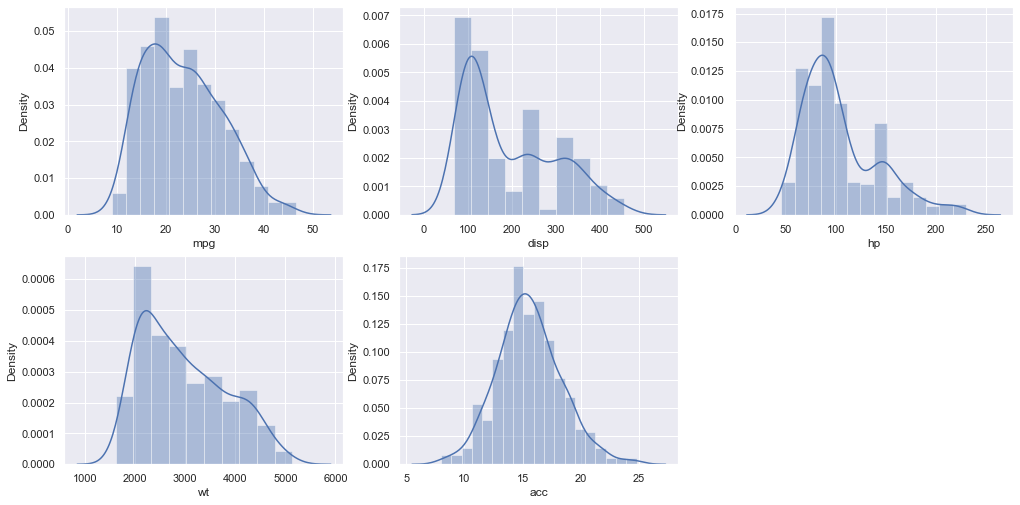

In [81]:
#plot density
plt.figure(figsize=(17, 13))
col = 1
for i in car_num.columns:
    plt.subplot(3, 3, col)
    sns.distplot(car_num[i], color = 'b')
    col += 1

* Displacement and Horsepower seem to be skewed to the right
* mpg and weight are seem to be lightly right skewed
* acceleration is normally distributed

In [82]:
#joining the categorical and numerical variables
car=pd.concat([car_cat,car_num],axis=1)

In [83]:
#checking for attribute type
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cyl        398 non-null    int64  
 1   yr         398 non-null    int64  
 2   origin     398 non-null    object 
 3   mpg_level  398 non-null    object 
 4   mpg        398 non-null    float64
 5   disp       398 non-null    float64
 6   hp         398 non-null    float64
 7   wt         398 non-null    int64  
 8   acc        398 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [84]:
#create dummy varibale for mpg_level and origin and creating a seperate datset for k-means and heirarchical clustering
car = pd.get_dummies(car, columns=['origin'])
car = pd.get_dummies(car, columns=['mpg_level'])
car.head()
carH=car.copy()
carK=car.copy()

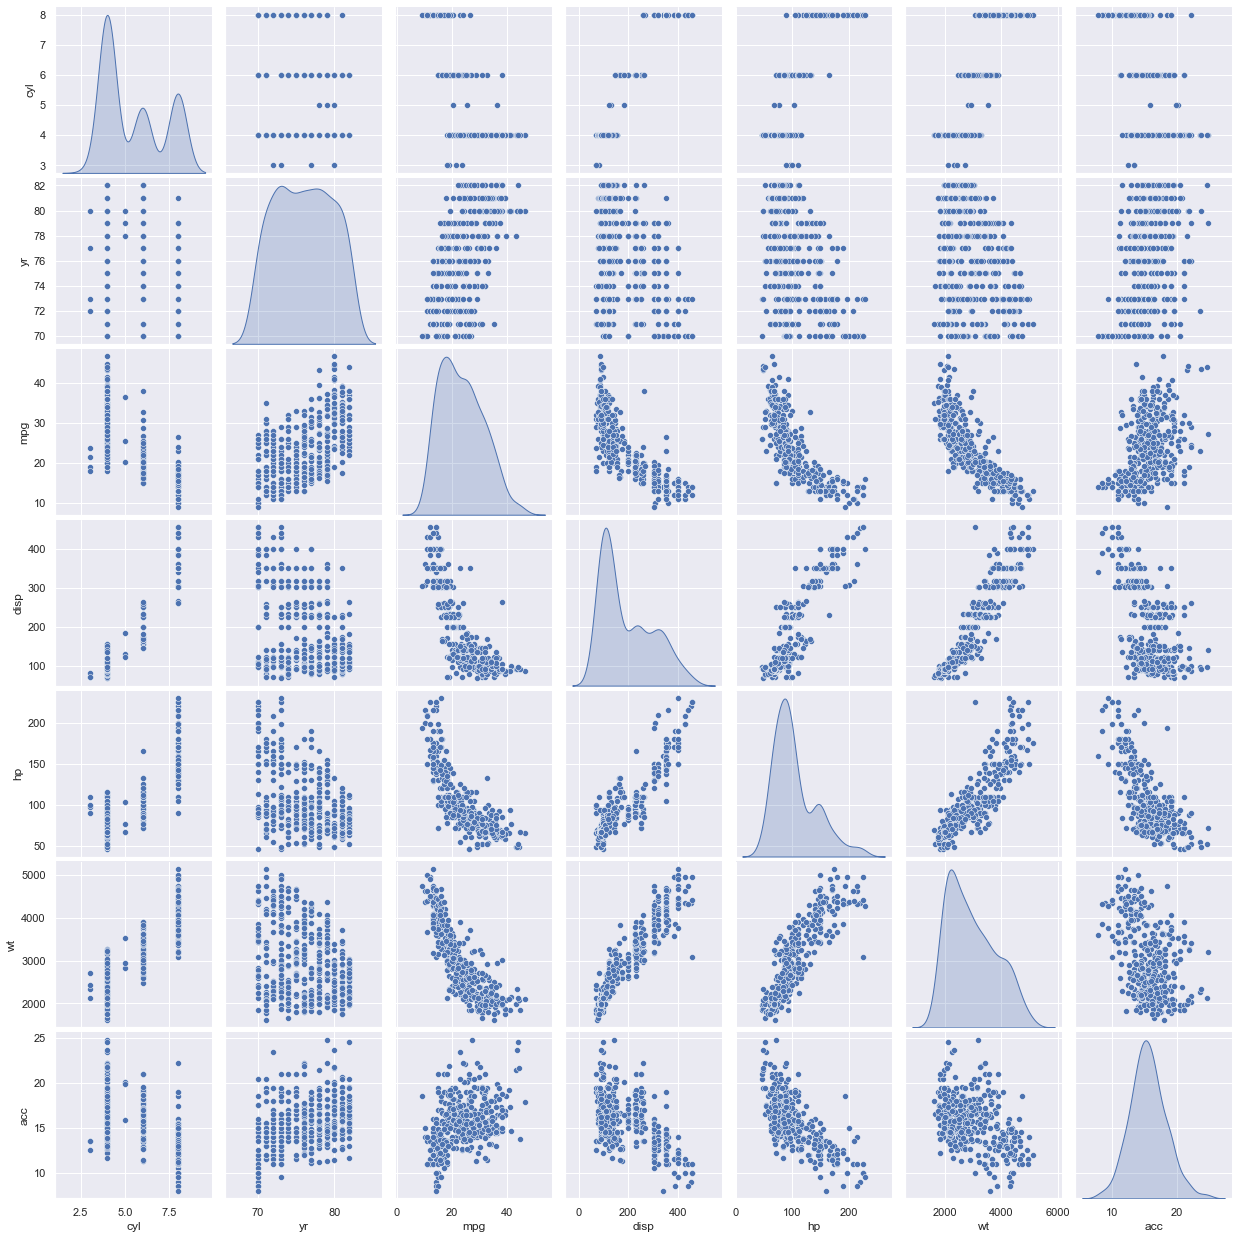

In [85]:
#pair plot for the numeric attributes
car_attr = car.iloc[:, 0:7]
sns.pairplot(car_attr, diag_kind='kde');

There appears to be a linear relationship between the variables

In [86]:
#dropping the created dummy variable
car2=car.drop(['origin_america','origin_asia','origin_europe','mpg_level_high','mpg_level_low','mpg_level_medium'],axis=1)

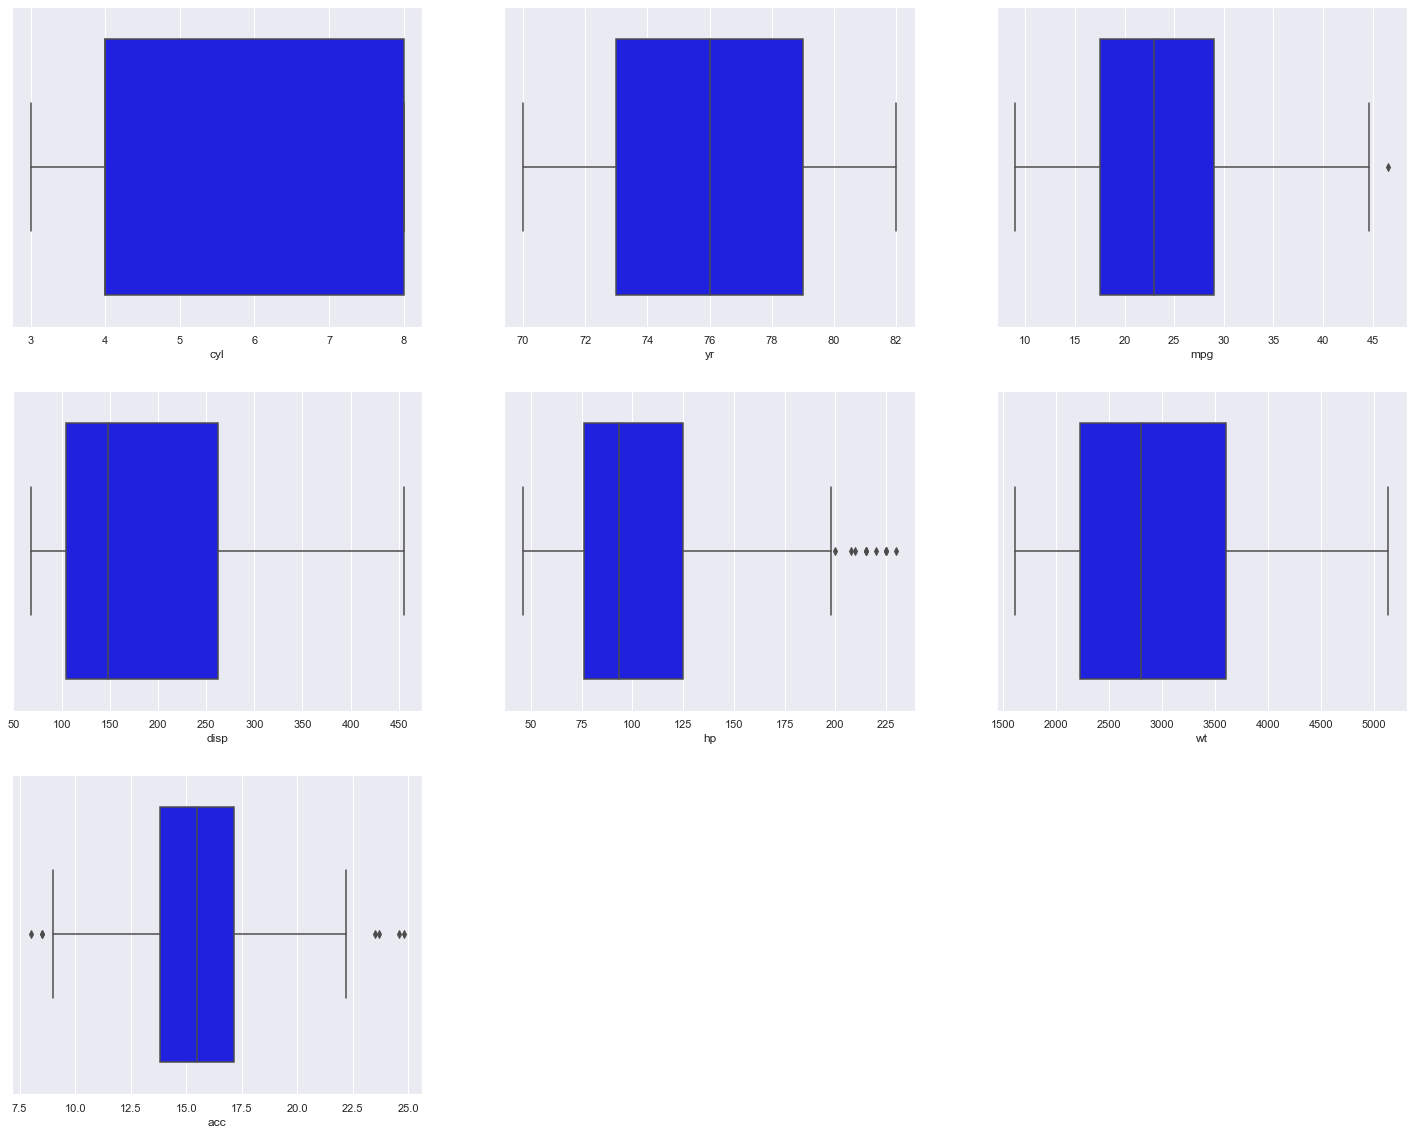

In [87]:
#checking of outliers
plt.figure(figsize=(25, 20))
col = 1
for i in car2.columns:
    plt.subplot(3, 3, col)
    sns.boxplot(car2[i],color='blue')
    col += 1

In [88]:
#replacing outliers with IQR (Q1 and Q3 +-1.5*IQR)
IQR1 = stats.iqr(car2['hp'], interpolation = 'midpoint')
IQR2 = stats.iqr(car2['acc'], interpolation = 'midpoint')

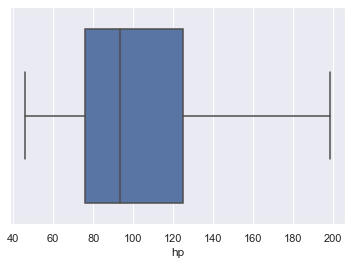

In [89]:
#Horsepower after imputing outliers
Q3 = car2['hp'].quantile(0.75)
car2['hp'] = np.where(car2["hp"] >(Q3+1.5*IQR1), 198.5,car2['hp'])
sns.boxplot(car2['hp']);

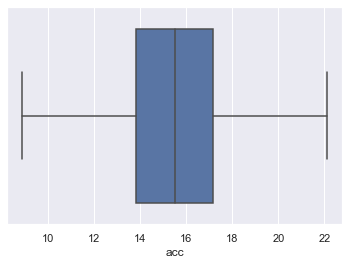

In [90]:
#accelaration after imputing outliers
Q1 = car2['acc'].quantile(0.25)
Q31=car2['acc'].quantile(0.75)
car2['acc'] = np.where(car2["acc"] >(Q31+1.5*IQR2),22.10 ,car2['acc'])
car2['acc'] = np.where(car2["acc"] <(Q1-1.5*IQR2),(Q1-1.5*IQR2),car2['acc'])
sns.boxplot(car2['acc']);

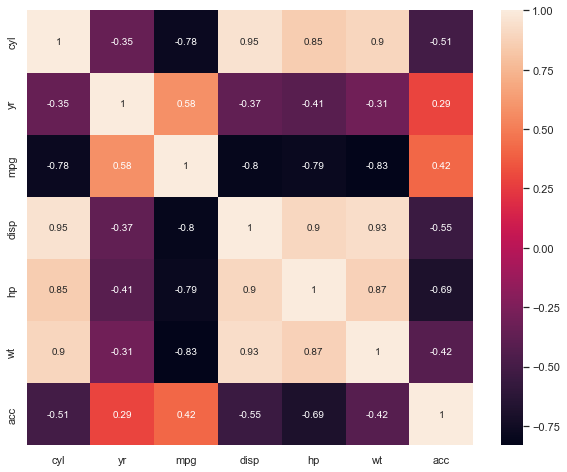

In [91]:
#checking for correlation
plt.figure(figsize=(10,8))
corr=car2.corr()
sns.heatmap(corr,annot=True);

* 'cyl' & 'disp', 'hp'& 'disp', 'wt'& 'disp', 'wt'& 'hp' are highly positive correlated to each other
* 'mpg' is mostly correlated with 'disp','hp','wt' and 'acc' is also negatively correlated with 'hp'
* 'yr' is slighty correlated with each other
Note:
cyl: cylinders
acc: acceleration
disp: displacement
yr: model year
hp: horsepower
wt: weight
mpg: milage per galloons

### K-Means Clustering

In [92]:
#seperating the numeric values
cc = car.iloc[:,0:7] 
cc_z1 = cc.apply(zscore)
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117


In [95]:
#calculating the within sum of squares
wss =[] 
for i in range(2,10):
    KM = KMeans(n_clusters=i)
    KM.fit(cc_z1)
    wss.append(KM.inertia_)
wss

[1294.841895072732,
 946.019790855379,
 738.3932235924669,
 666.9186671983913,
 594.774717719738,
 548.7486725223428,
 497.4363256453522,
 453.9782551559805]

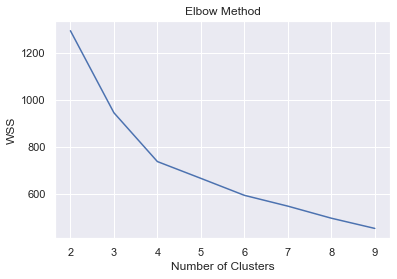

In [96]:
#plotting the WSS against the number of cluster to come up with optimal number of clusters using Elbow-method
plt.plot(range(2,10), wss);
plt.title('Elbow Method');
plt.xlabel("Number of Clusters")
plt.ylabel("WSS");

Possible elbow points may 3,4,6. Most probably, the variation is high at 3clusters and 4 clusters

In [139]:
#using 3 centroids for clustering
k_means = KMeans(n_clusters = 3)
k_means.fit(cc_z1)
labels = k_means.labels_

In [140]:
# Calculating silhouette_score
silhouette_score(cc_z1,labels)

0.34787074511469285

In [141]:
#calculating silhouette score for different centroids
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

 # Notice you start at 3 clusters for silhouette coefficient
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc_z1)
    score = silhouette_score(cc_z1,kmeans.labels_)
    silhouette_coefficients.append(score)
    

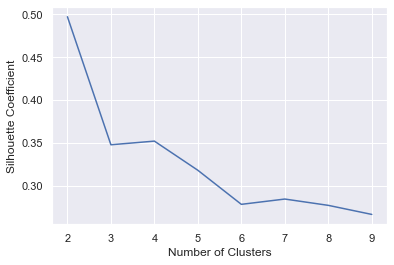

In [142]:
#plotting silhouette score for different centroids
plt.plot(range(2, 10), silhouette_coefficients)
plt.xticks(range(2, 10))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [143]:
#attaching the labels to the datasets
cc["cluster_K"] = labels
carK['cluster_K']=labels
Kclus=cc
Kclus.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,8,70,18.0,307.0,130.0,3504,12.0,0
1,8,70,15.0,350.0,165.0,3693,11.5,0
2,8,70,18.0,318.0,150.0,3436,11.0,0
3,8,70,16.0,304.0,150.0,3433,12.0,0
4,8,70,17.0,302.0,140.0,3449,10.5,0


In [189]:
#vieweing the distribution of clusters
cc.cluster_K.value_counts().sort_index()

0    102
1    141
2    155
Name: cluster_K, dtype: int64

In [190]:
#attaching the clsuters to the scaled data
cc_z1["cluster_K"] = labels
cc_z1.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K
0,1.498191,-1.627426,-0.706439,1.090604,0.673118,0.630870,-1.295498,0
1,1.498191,-1.627426,-1.090751,1.503514,1.589958,0.854333,-1.477038,0
2,1.498191,-1.627426,-0.706439,1.196232,1.197027,0.550470,-1.658577,0
3,1.498191,-1.627426,-0.962647,1.061796,1.197027,0.546923,-1.295498,0
4,1.498191,-1.627426,-0.834543,1.042591,0.935072,0.565841,-1.840117,0


In [191]:
#aggregating the numerical variable with the clusters formed with the mean
aggdata=cc.iloc[:,0:8].groupby('cluster_K').mean()
aggdata['Freq']=cc.cluster_K.value_counts().sort_index()
aggdata

,cyl,yr,mpg,disp,hp,wt,acc,Freq
cluster_K,,,,,,,,
0,7.980392,73.823529,14.788235,344.676471,159.558824,4118.784314,12.809804,102
1,4.042553,79.049645,31.964539,107.723404,74.751773,2261.950355,16.707801,141
2,5.077419,74.683871,21.570323,171.854839,94.825806,2859.212903,16.346452,155


Clearly shows three distinct group with a difference in average between the clusters and variables

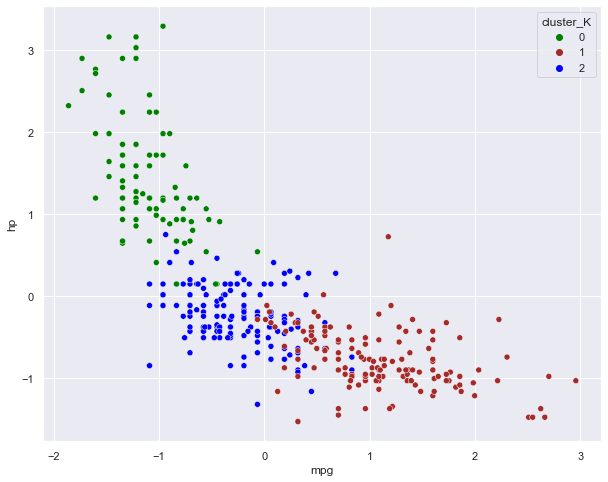

In [192]:
#plotting the clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(x="mpg", y="hp", hue="cluster_K",
              data=cc_z1, 
                    palette=['green','brown', 'blue']);

In [194]:
cc.cluster_K.value_counts().sort_index()

0    102
1    141
2    155
Name: cluster_K, dtype: int64

In [195]:
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K,cluster_group_3,cluster_group_high,cluster_group_low,cluster_group_medium
0,8,70,18.0,307.0,130.0,3504,12.0,0,0,1,0,0
1,8,70,15.0,350.0,165.0,3693,11.5,0,0,1,0,0
2,8,70,18.0,318.0,150.0,3436,11.0,0,0,1,0,0
3,8,70,16.0,304.0,150.0,3433,12.0,0,0,1,0,0
4,8,70,17.0,302.0,140.0,3449,10.5,0,0,1,0,0


In [196]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(cc)
prediction=final_model.predict(cc)

#Append the prediction 
cc["cluster_group"] = prediction
cc["cluster_group"] = prediction
print("Groups Assigned : \n")
cc.head()

Groups Assigned : 



,cyl,yr,mpg,disp,hp,wt,acc,cluster_K,cluster_group_3,cluster_group_high,cluster_group_low,cluster_group_medium,cluster_group
0,8,70,18.0,307.0,130.0,3504,12.0,0,0,1,0,0,3
1,8,70,15.0,350.0,165.0,3693,11.5,0,0,1,0,0,3
2,8,70,18.0,318.0,150.0,3436,11.0,0,0,1,0,0,3
3,8,70,16.0,304.0,150.0,3433,12.0,0,0,1,0,0,3
4,8,70,17.0,302.0,140.0,3449,10.5,0,0,1,0,0,3


In [197]:
cc_Clust = cc.groupby(['cluster_group'])
cc_Clust.mean()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K,cluster_group_3,cluster_group_high,cluster_group_low,cluster_group_medium
cluster_group,,,,,,,,,,,,
0,4.762376,77.089109,24.261386,159.118812,95.737624,2765.435644,15.724752,1.633663,0.000000,0.019802,0.0,0.980198
1,8.000000,73.608696,13.991304,356.536232,165.130435,4366.594203,13.042029,0.000000,0.000000,0.000000,1.0,0.000000
2,3.978723,76.617021,30.791489,98.258865,73.641844,2111.439716,16.591489,1.276596,0.992908,0.000000,0.0,0.007092
3,6.632184,75.678161,18.406897,258.126437,115.701149,3493.241379,15.731034,1.218391,0.000000,1.000000,0.0,0.000000


### Linear Regression

In [198]:
X = car.drop(['mpg','origin_europe','mpg_level_low'], axis=1)
# the dependent variable
y = car[['mpg']]

In [199]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [200]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [201]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.5134441386218939
The coefficient for yr is 0.44346504291168265
The coefficient for disp is 0.01068885839464703
The coefficient for hp is 0.010315514536313882
The coefficient for wt is -0.004538788568737155
The coefficient for acc is 0.1918342560886259
The coefficient for origin_america is -1.7306209513689055
The coefficient for origin_asia is -0.8976724344009429
The coefficient for mpg_level_high is 8.552374663817028
The coefficient for mpg_level_medium is 1.5941218694850463


In [202]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -1.6635717568649753


In [203]:
regression_model.score(X_train, y_train)

0.8967703023839786

In [204]:
Z=regression_model.score(X_test, y_test)
Z

0.9037421476349176

### Linear regression on data with K means cluster

In [205]:
#renaming the cluster labels to low,medium,high vehicles and creating dummy variables of it
cc['cluster_group']=cc['cluster_group'].astype('category')
cc['cluster_group'] = cc['cluster_group'].replace({2:'high',1: 'medium', 0: 'low'})
cc = pd.get_dummies(cc, columns=['cluster_group'])

In [206]:
cc.head()

,cyl,yr,mpg,disp,hp,wt,acc,cluster_K,cluster_group_3,cluster_group_high,cluster_group_low,cluster_group_medium,cluster_group_3,cluster_group_high,cluster_group_low,cluster_group_medium
0,8,70,18.0,307.0,130.0,3504,12.0,0,0,1,0,0,1,0,0,0
1,8,70,15.0,350.0,165.0,3693,11.5,0,0,1,0,0,1,0,0,0
2,8,70,18.0,318.0,150.0,3436,11.0,0,0,1,0,0,1,0,0,0
3,8,70,16.0,304.0,150.0,3433,12.0,0,0,1,0,0,1,0,0,0
4,8,70,17.0,302.0,140.0,3449,10.5,0,0,1,0,0,1,0,0,0


In [207]:
X = cc.drop(['mpg','cluster_group_high','cluster_group_low','cluster_group_medium'], axis=1)
# the dependent variable
y = cc[['mpg']]

In [208]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [209]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [210]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for cyl is -0.765479935031324
The coefficient for yr is 0.6834332502638408
The coefficient for disp is 0.0076956800395735795
The coefficient for hp is -0.029996397456613318
The coefficient for wt is -0.004731518524089819
The coefficient for acc is 0.08792006798463592
The coefficient for cluster_K is -2.058050320362103
The coefficient for cluster_group_3 is 2.349224296074067
The coefficient for cluster_group_3 is -0.5661554338125632


In [211]:
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

The intercept for our model is -8.3102074684824


In [212]:
regression_model.score(X_train, y_train)

0.8397665339456517

In [213]:
K=regression_model.score(X_test, y_test)
K

0.8693399434870528

In [214]:
modellists = []
modellists.append(['Linear Regression on Original Data set', Z*100])
modellists.append(['Linear Regression with K means clusters', K*100])

In [215]:
mdl_df = pd.DataFrame(modellists, columns = ['Model','r^2 on Test'])
mdl_df

,Model,r^2 on Test
0,Linear Regression on Original Data set,90.374215
1,Linear Regression with K means clusters,86.933994


### Summary
K-means appears to explain the highest variation in the datset, but with a difference of only 1% when compared with other models, to get more clarity a larger dataset may be used, since this is a dataset of used cars it doesn't give us how many previous owners has the cars seen which might be helful variable,the gender of the previous owners, the reason/purpose that the cars were being used is also an important factor which the dataset doen't capture. With the above mentioned features it may be possible to get a higher accuracy or explainability of the models and its variables

### Part B: 

### * DOMAIN:   
Automobile
### * CONTEXT: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
### * DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were
used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.
### * PROJECT OBJECTIVE: 
Apply dimensionality reduction technique – PCA and train a model and compare relative results

In [316]:
#Loading the required packages
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn import metrics


### EDA

In [317]:
#import the dataset
veh = pd.read_csv('vehicle.csv')
veh.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [318]:
veh.shape

(846, 19)

dataset has 846 rows and 19 columns

In [319]:
veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Except 'class',all the features were continuous

In [320]:
veh.duplicated().sum()

0

There is no duplicates present inn this dataframe

In [321]:
veh.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

There appears to be quite a few missing values

In [322]:
#replacing the missing values with median values
for cols in veh.columns:
    if(cols != 'class'): 
        veh[cols] = veh[cols].fillna(veh[cols].median())

In [323]:
veh.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

All the missing values were replaced by its median value and achieved no null values in dataset

In [324]:
#5-point summary
veh.describe().T

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


It gives the descriptive statistics (mean, median, mode, percentiles, min, max, standard deviation) of the columns of the dataset.
By analysing it, we can see that

-compactness, circularity, distance_circularity, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about.2, hollows_ratio are approximately normally distributed.

-radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, scaled_variance, scaled_variance.1, skewness_about, skewness_about.1 are approx. right skewed distribution.

In [392]:
#It shows data types of columns
vehicle_df.dtypes

NameError: name 'vehicle_df' is not defined

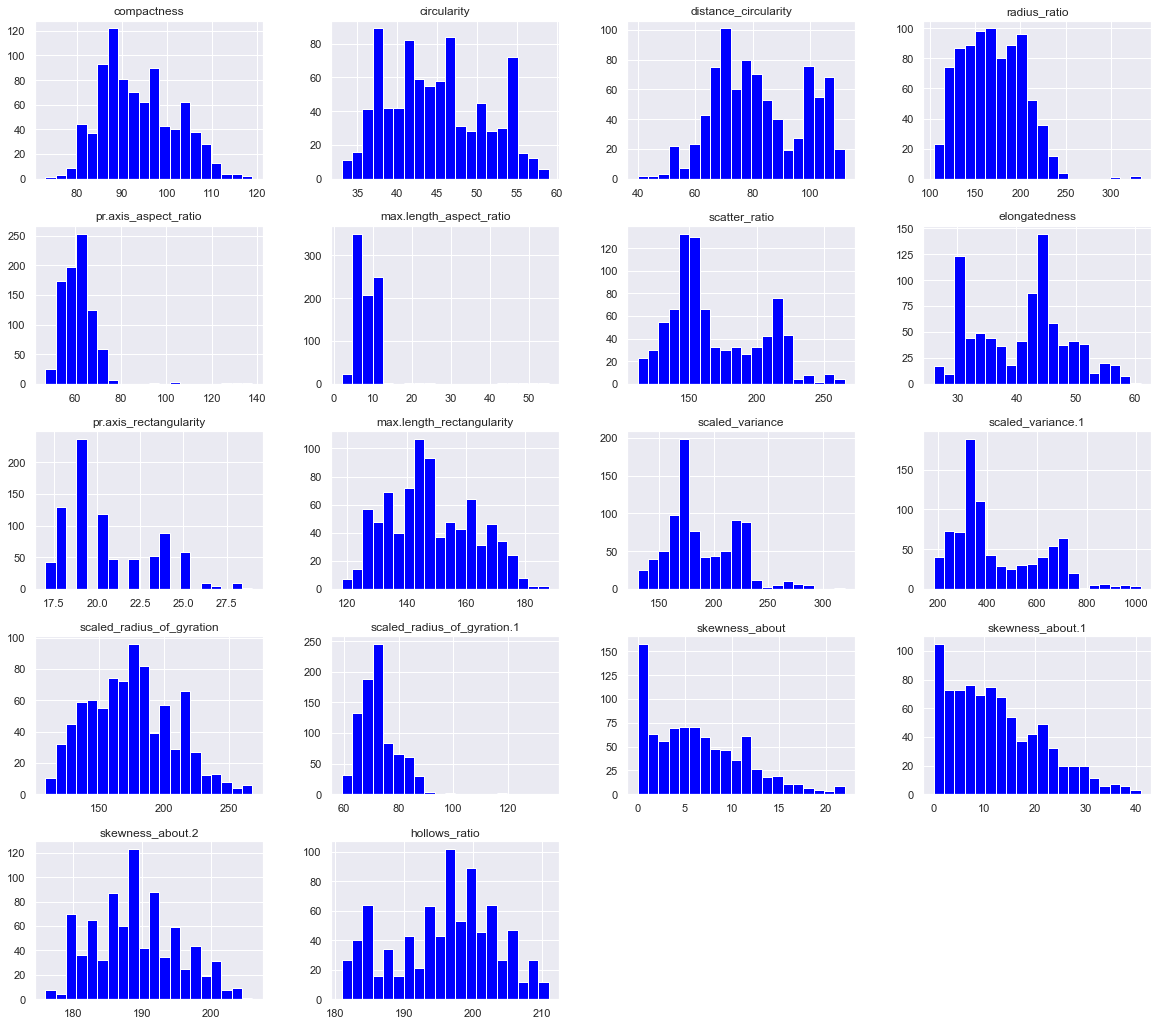

In [325]:
#plotting the distribution of the numerical variables
veh.hist(bins = 20, figsize = (20, 18), color = 'blue')
plt.show()

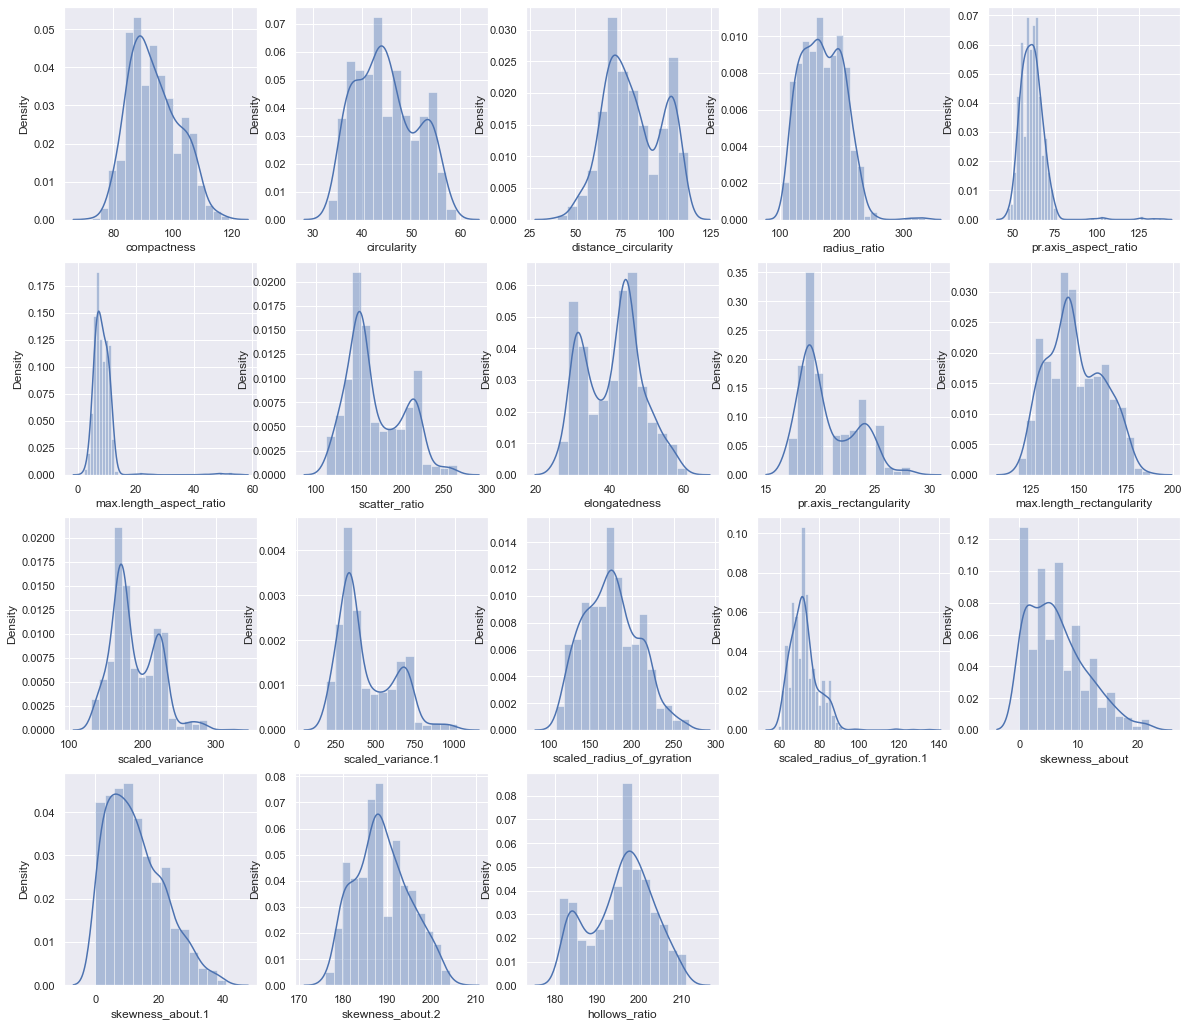

In [326]:
#Density plots
plt.figure(figsize=(20, 18))
col = 1
for i in veh.drop(columns='class').columns:
    plt.subplot(4, 5, col)
    sns.distplot(veh[i], color = 'b')
    col += 1 

Columns have data distributed across multiple scales. Several columns have distributions that are not unimodal (eg.: distance_circularity, hollows_ratio, elongatedness Column skweness_about, skewness_about.1 have data that is right skewed whereas for column skewness_about.2 data is nearly normally distributed. Some columns have long right tail (eg.: pr.axis_aspect_ratio) as evident from the above distplot it is highly likely that they will have outliers.

car    429
bus    218
van    199
Name: class, dtype: int64


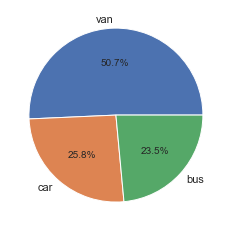

In [327]:
#checking the distribution of the class variable
print(veh['class'].value_counts())
cat=veh['class']
value=veh['class'].unique()
plt.pie(cat.value_counts(), labels=value , autopct='%1.1f%%' )
plt.show()

Out of all category, almost 50% of are 'van' , remaining 50% are almost equally shared by 'car' and 'bus'

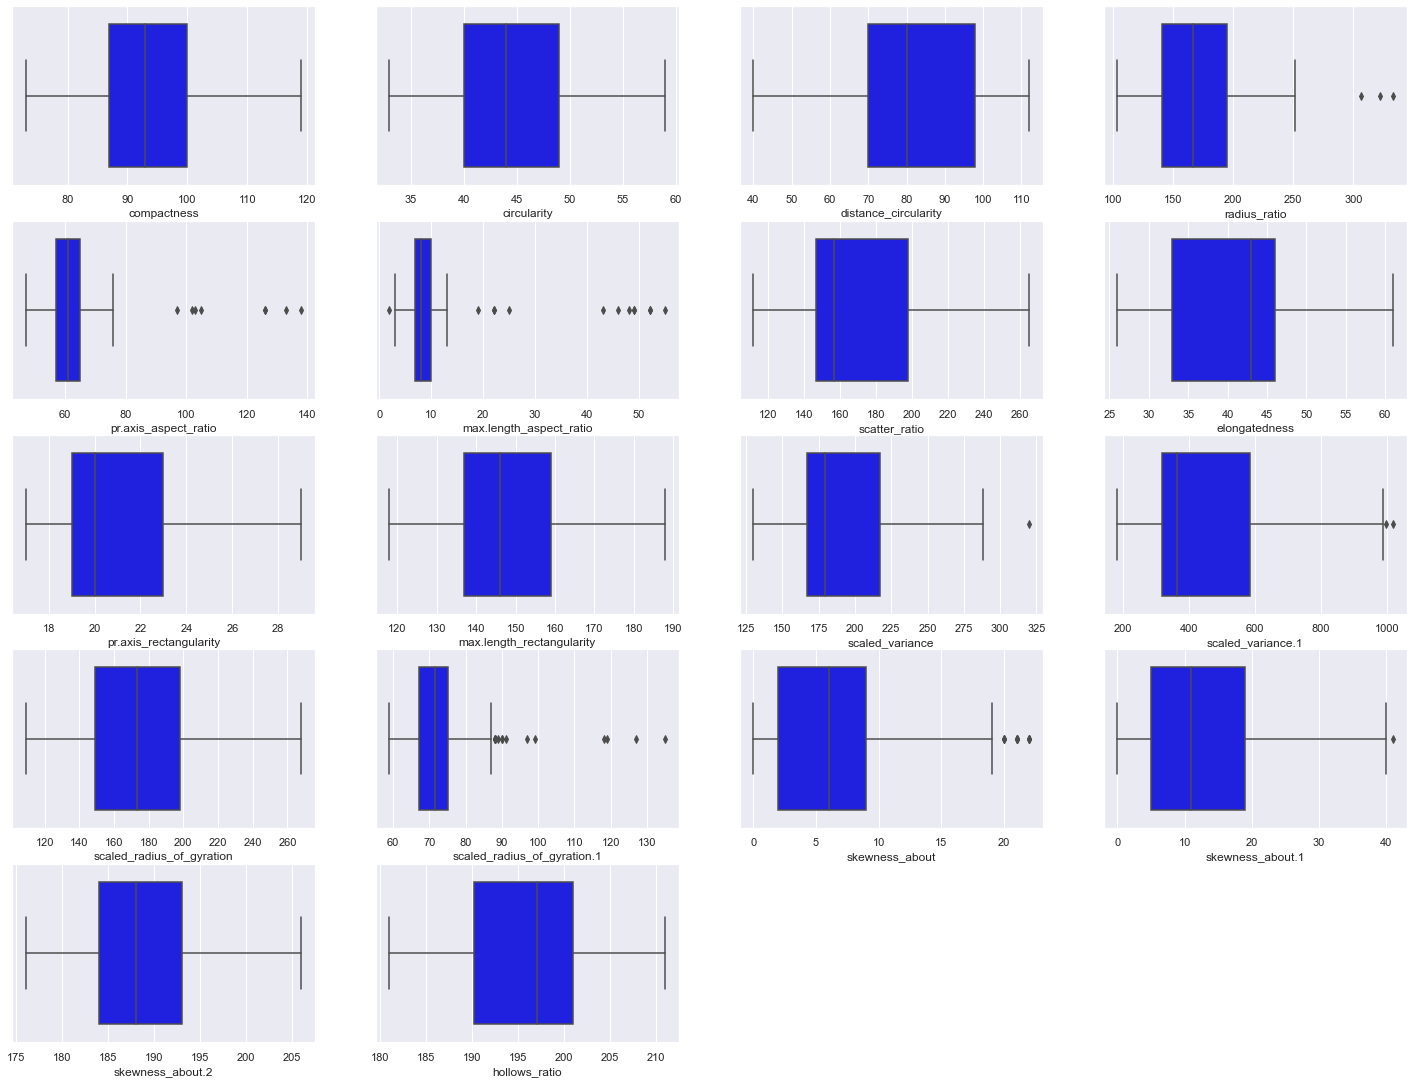

In [328]:
#boxplots for outliers
plt.figure(figsize=(25,23))
col = 1
for i in veh.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(veh[i],color='blue')
    col += 1

Above Boxplots reveal that there are outliers in 8 different columns., will have them treated eventually

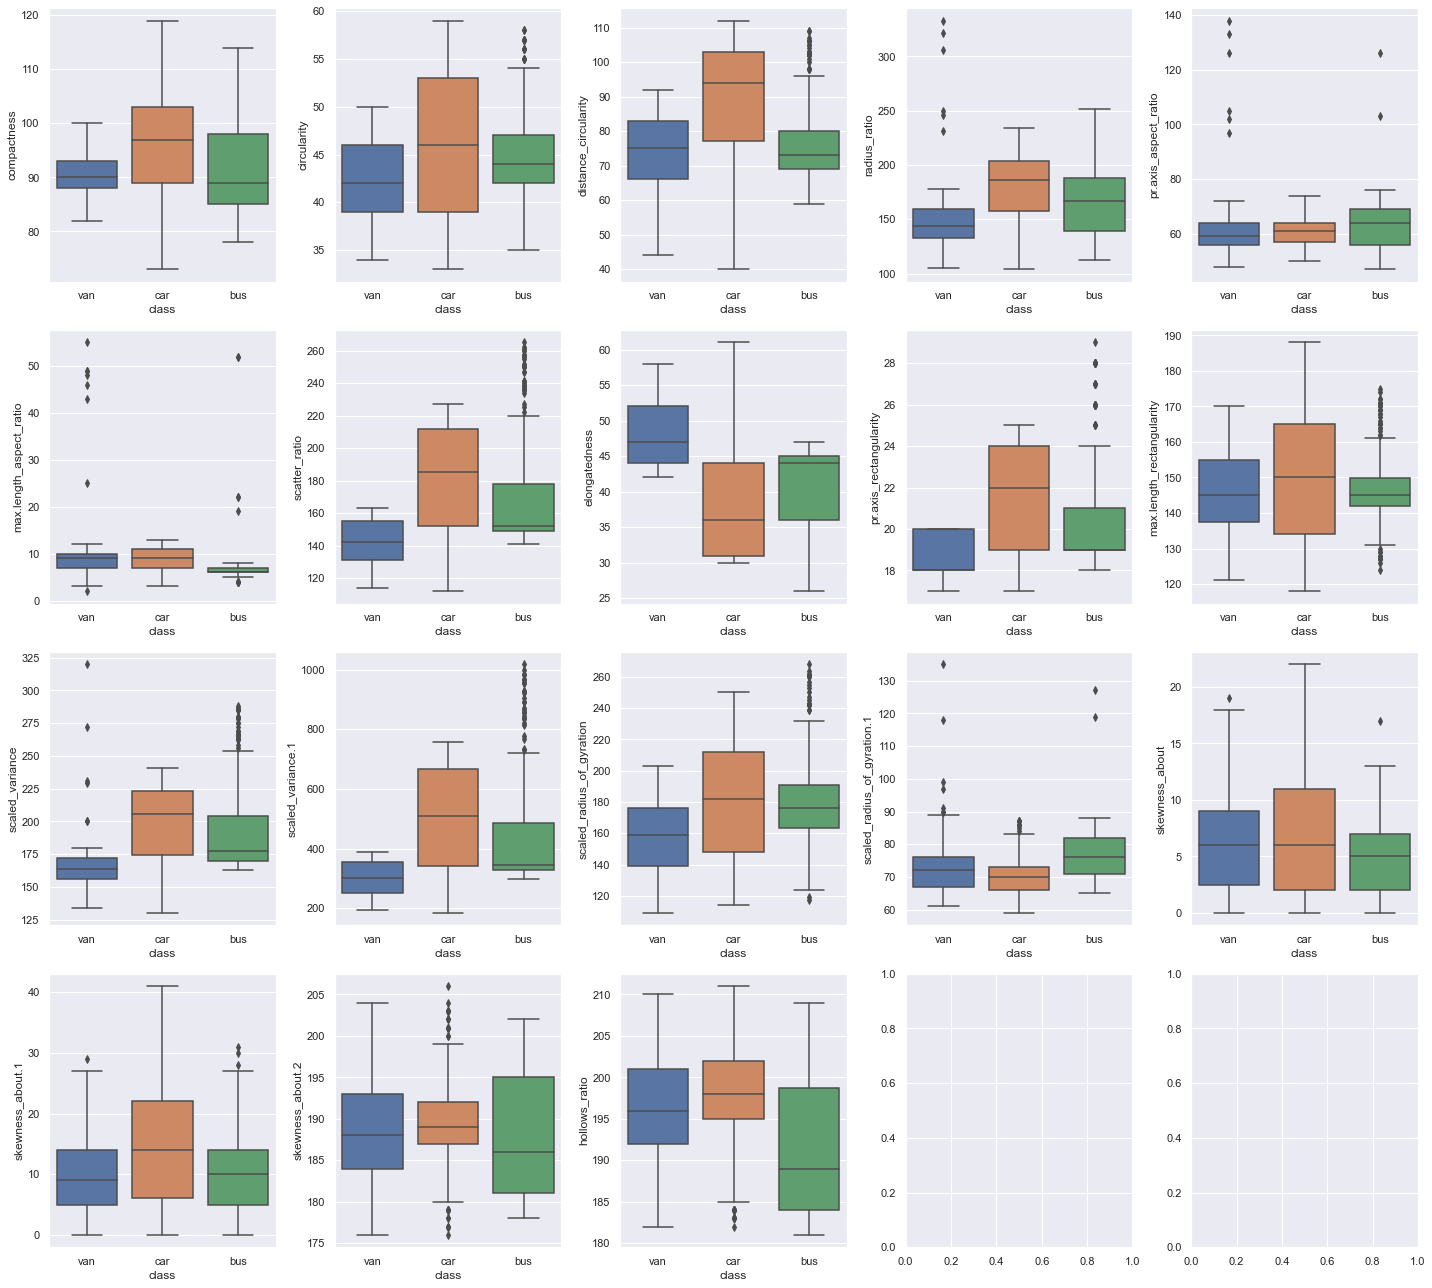

In [329]:
#Boxplots against the class with other numeric variables
fig,axs = plt.subplots(4,5,figsize=(20,18))
sns.boxplot(x="class", y="compactness",data=veh,ax=axs[0,0]);
sns.boxplot(x="class", y="circularity",data=veh,ax=axs[0,1]);
sns.boxplot(x="class", y="distance_circularity",data=veh,ax=axs[0,2]);
sns.boxplot(x="class", y="radius_ratio",data=veh,ax=axs[0,3]);
sns.boxplot(x="class", y="pr.axis_aspect_ratio",data=veh,ax=axs[0,4]);
sns.boxplot(x="class", y="max.length_aspect_ratio",data=veh,ax=axs[1,0]);
sns.boxplot(x="class", y="scatter_ratio",data=veh,ax=axs[1,1]);
sns.boxplot(x="class", y="elongatedness",data=veh,ax=axs[1,2]);
sns.boxplot(x="class", y="pr.axis_rectangularity",data=veh,ax=axs[1,3]);
sns.boxplot(x="class", y="max.length_rectangularity",data=veh,ax=axs[1,4]);
sns.boxplot(x="class", y="scaled_variance",data=veh,ax=axs[2,0]);
sns.boxplot(x="class", y="scaled_variance.1",data=veh,ax=axs[2,1]);
sns.boxplot(x="class", y="scaled_radius_of_gyration",data=veh,ax=axs[2,2]);
sns.boxplot(x="class", y="scaled_radius_of_gyration.1",data=veh,ax=axs[2,3]);
sns.boxplot(x="class", y="skewness_about",data=veh,ax=axs[2,4]);
sns.boxplot(x="class", y="skewness_about.1",data=veh,ax=axs[3,0]);
sns.boxplot(x="class", y="skewness_about.2",data=veh,ax=axs[3,1]);
sns.boxplot(x="class", y="hollows_ratio",data=veh,ax=axs[3,2]);
fig.tight_layout()

There is significant difference between classes when compared with the mean and median with all the numeric attributes

In [330]:
#find the outliers and replace them by median
for col_name in veh.drop(columns = 'class').columns:
    q1 = veh[col_name].quantile(0.25)
    q3 = veh[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    
    veh.loc[(veh[col_name] < low) | (veh[col_name] > high), col_name] = veh[col_name].median()

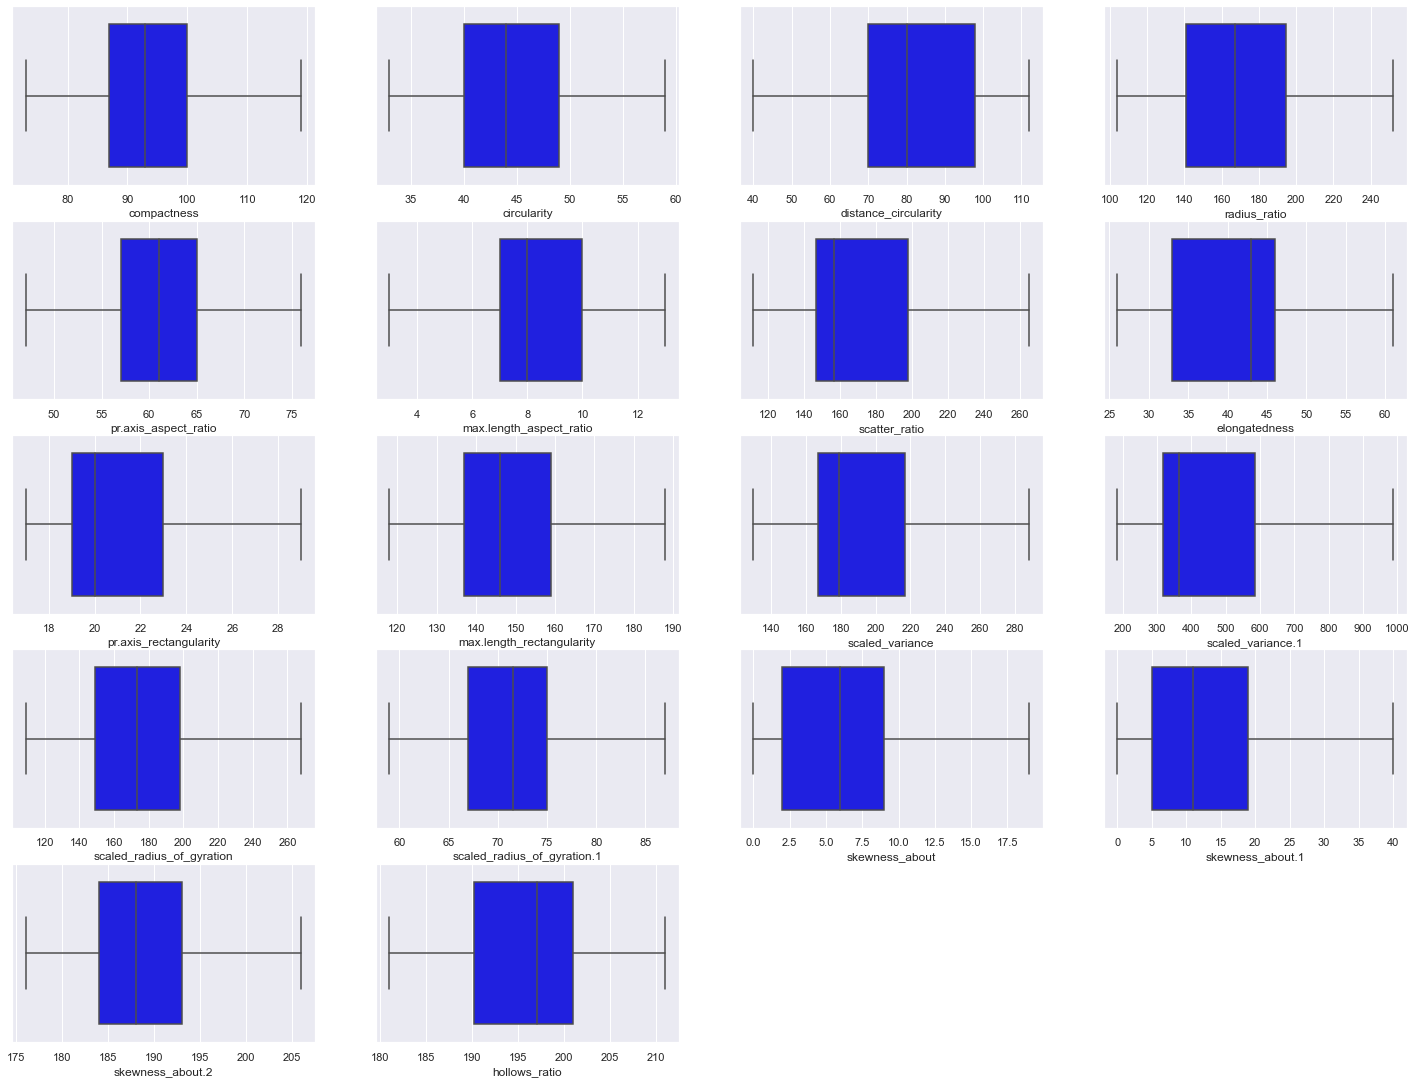

In [331]:
#boxplot after outlier treatment
plt.figure(figsize=(25,23))
col = 1
for i in veh.drop(columns='class').columns:
    plt.subplot(6, 4, col)
    sns.boxplot(veh[i],color='blue')
    col += 1

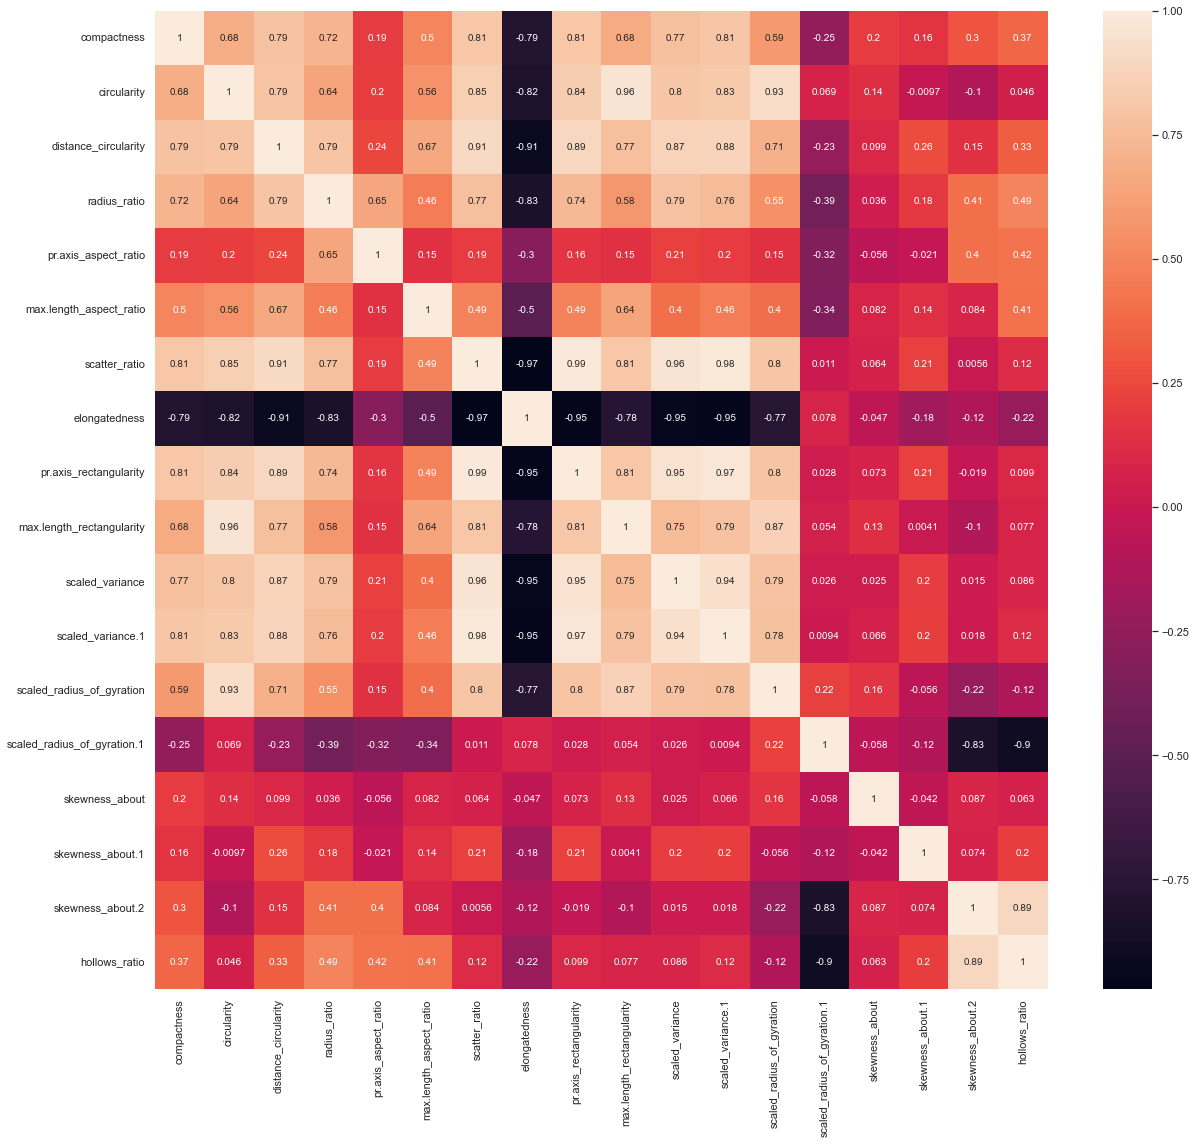

In [332]:
#checking for correlation
plt.figure(figsize=(20,18))
corr=veh.corr()
sns.heatmap(corr,annot=True);

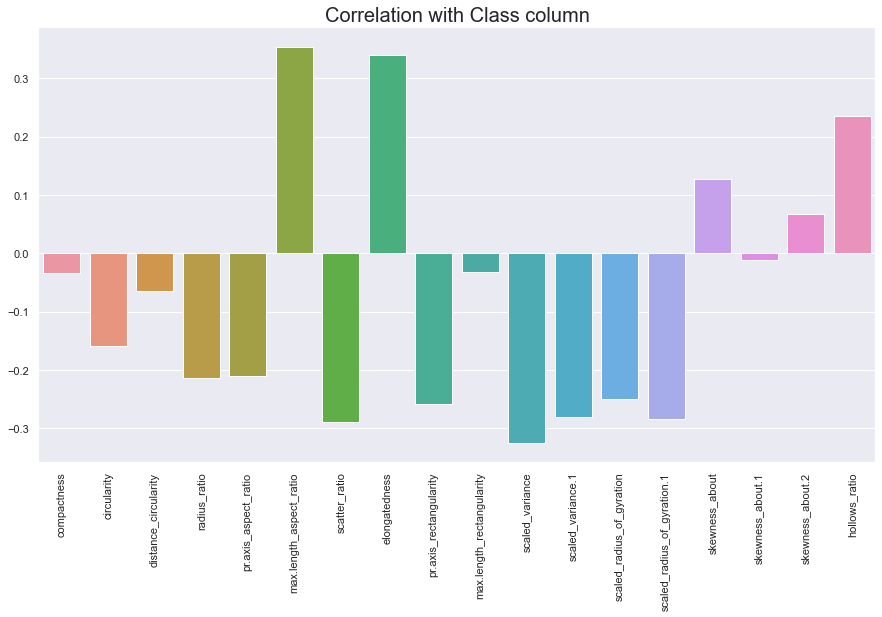

In [333]:
#spliiting the data to check for correlation with the class variable
X = veh.loc[:, veh.columns != 'class']
y = veh['class'].astype('category').cat.codes
#plotting the correlation with target variable
plt.figure(figsize = (15, 8))
ax=sns.barplot(x=X.columns, y = X.corrwith(y))
sns.barplot(x = X.columns, y = X.corrwith(y))
plt.title('Correlation with Class column', fontsize = 20)
x=plt.setp(ax.get_xticklabels(), rotation=90)

### PCA

In [343]:
#scaling the muerica variables
XScaled=X.apply(zscore)
XScaled.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.300945,1.933135,0.912212,-0.207598,0.136262,-0.224342,0.758332,-0.400771,-0.337407,0.285705,-0.315806,-0.032330,0.387162,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.850666,-0.740596,0.427456,-0.599423,0.520519,-0.610886,-0.344578,-0.594220,-0.618623,-0.513630,0.009122,0.624090,0.161740,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.265808,0.863642,0.912212,1.148719,-1.144597,0.935290,0.689401,1.114582,1.131806,1.392477,0.171586,1.718123,-0.401818,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.290423,0.328896,0.427456,-0.750125,0.648605,-0.610886,-0.344578,-0.916635,-0.739145,-1.466683,-1.453054,-0.032330,-0.289106,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.141310,-0.027601,-0.057300,-0.599423,0.520519,-0.610886,-0.275646,1.694930,-0.647319,0.408680,-0.072110,0.624090,-0.176395,-1.450481,-1.699181


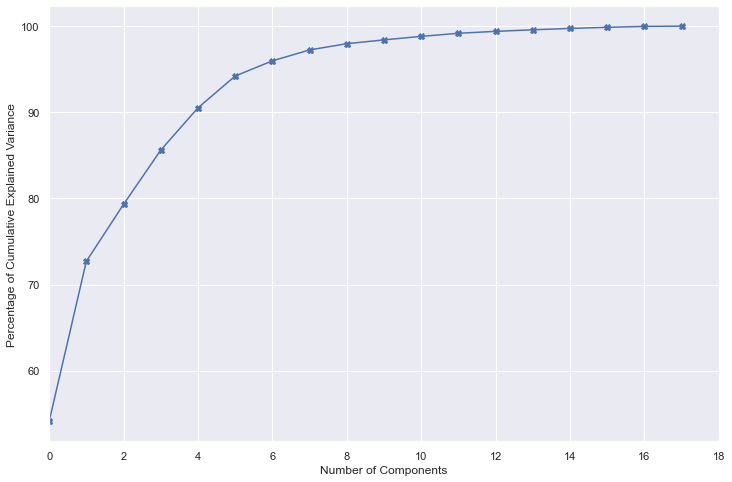

In [393]:
#plotting the cummulative variance explained by the principal componets
pca = PCA()
X_pca_ = pca.fit_transform(XScaled)
plt.figure(figsize = (12, 8))
plt.plot((np.cumsum(pca.explained_variance_ratio_) * 100), marker = 'X')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance');


In [394]:
print(pca.explained_variance_)

[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 4.01448646e-02 3.22758478e-02 2.93936408e-02 2.27005257e-02
 1.98136761e-02 5.16287320e-03]


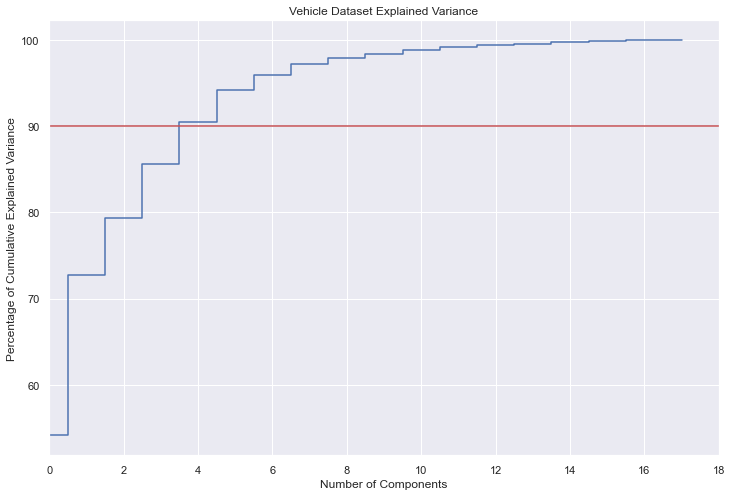

In [395]:
#plotting the cumulative variance
plt.figure(figsize = (12, 8))
plt.step(list(range(18)), (np.cumsum(pca.explained_variance_ratio_) * 100), where = 'mid')
plt.xlim(0, 18)
plt.xlabel('Number of Components')
plt.ylabel('Percentage of Cumulative Explained Variance')
plt.title('Vehicle Dataset Explained Variance');
#Drawing a horizontal line on the above plot to highlight the threshold of 90%.
plt.axhline(y = 90, color = 'r', linestyle = '-')


We can see that the first six components explain more than 95% of variation. Between first 5 components, more than 91% of the information is captured. The above plot shows almost 95% variance by the first 6 components. Therefore we can drop 7th component onwards.

In [396]:
#Using 10 components and printing the eigen vectors
pca3 = PCA(n_components=10)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710147 -0.13899555 -0.08001743  0.13374437  0.12360146 -0.63489336
   0.08555745 -0.07907344  0.08164

In [397]:
#printing the original features and the reduced features
pca_10 = PCA(n_components = 10)
X_pca = pca_10.fit_transform(XScaled)
print('Original number of features:', X.shape[1])
print('Reduced number of features:', X_pca.shape[1])


Original number of features: 18
Reduced number of features: 10


In [398]:
#viewing the first 5 observations of the pca components
pca_df = pd.DataFrame(data = X_pca)
pca_df.head()

,0,1,2,3,4,5,6,7,8,9
0,0.584228,-0.675673,-0.453334,-0.750656,-0.777515,-1.848809,-0.180415,-0.681969,0.312670,0.144116
1,-1.512180,-0.348934,-0.333436,1.268953,-0.324929,-0.118317,0.203308,0.104425,-0.296258,-0.390978
2,3.913448,0.234507,-1.265094,0.137224,0.915751,-0.685594,0.811588,0.173053,0.191085,-0.529487
3,-1.535193,-3.044413,-0.469623,0.324317,-0.611590,0.367777,0.118281,-0.195857,-0.389317,0.249992
4,-0.642062,1.488882,-0.246288,-0.550939,0.471655,-1.012698,0.468846,1.272885,1.487357,-0.003706


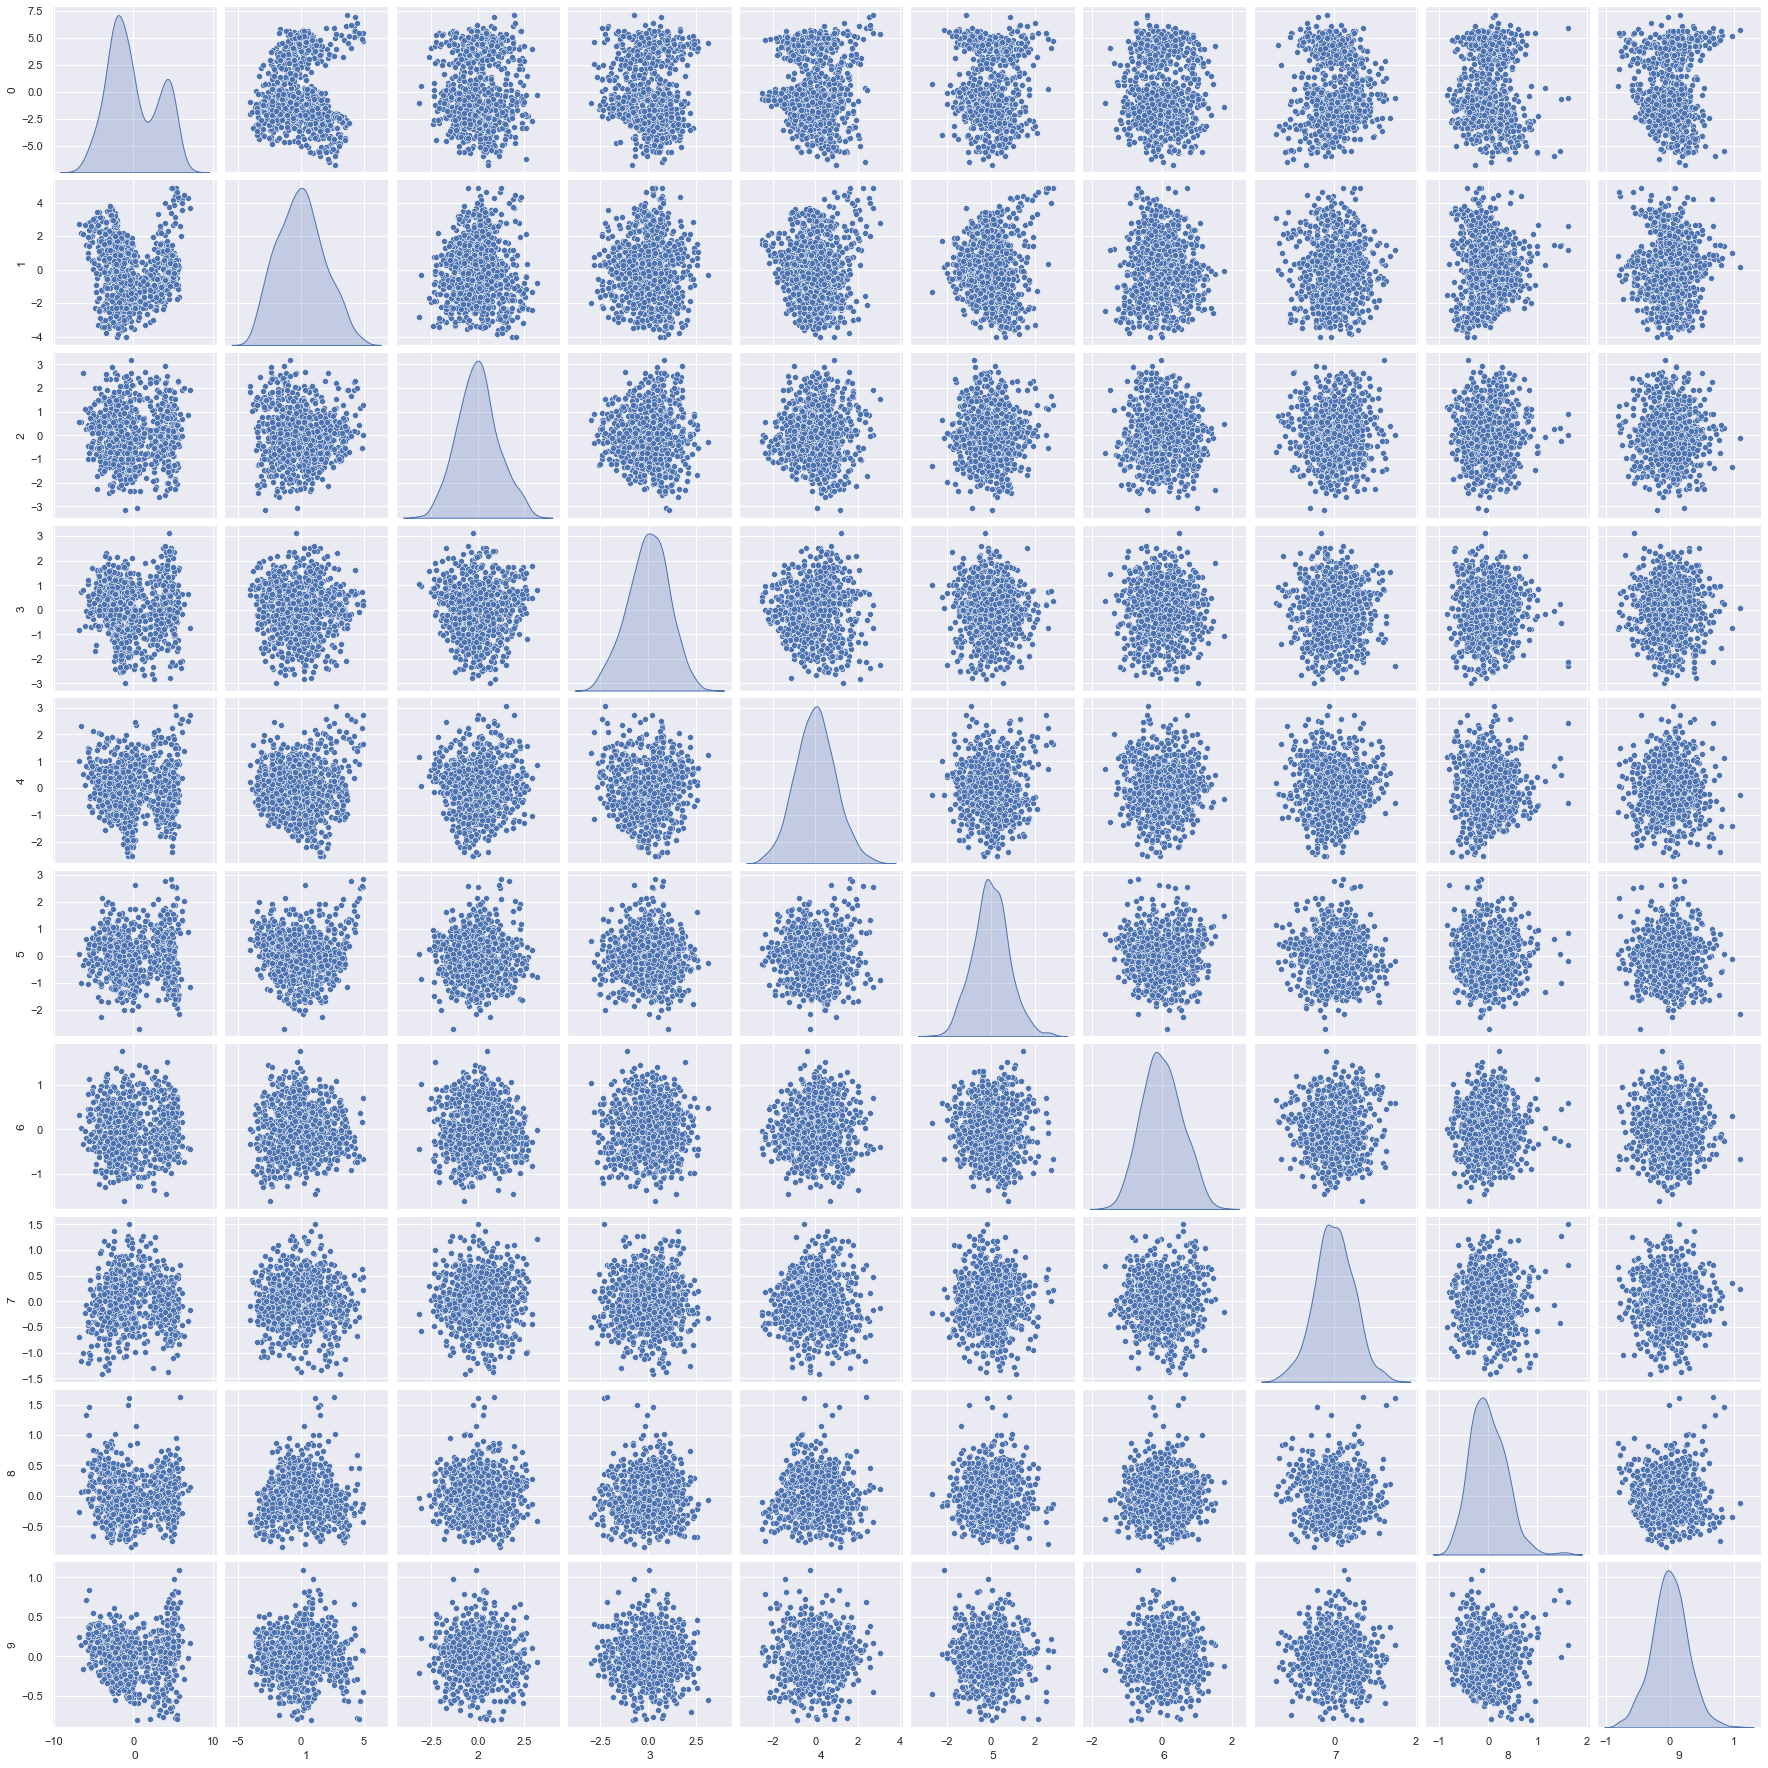

In [399]:
sns.pairplot(pca_df, diag_kind = 'kde');

### SVM

In [400]:
#splitting the original data into train and test 70:30
X_train, X_test, y_train, y_test = train_test_split(XScaled, y, test_size = 0.3, random_state = 10)
rtr, ctr = X_train.shape
print('The training set comprises of', rtr, 'rows and', ctr, 'columns.')



The training set comprises of 592 rows and 18 columns.


In [401]:
rt, ct = X_test.shape
print('The test set comprises of', rt, 'rows and', ct, 'columns.')


The test set comprises of 254 rows and 18 columns.


In [402]:

#splitting the pca data into train and test 70:30
X_tr, X_te, y_tr, y_te = train_test_split(X_pca, y, test_size = 0.3, random_state = 10)
rtr_pca, ctr_pca = X_tr.shape
print('The PCA training set comprises of', rtr_pca, 'rows and', ctr_pca, 'columns.')

rt_pca, ct_pca = X_te.shape
print('The PCA test set comprises of', rt_pca, 'rows and', ct_pca, 'columns.')

# Building a Support Vector Machine on train data
svc_model = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model.fit(X_train, y_train)

The PCA training set comprises of 592 rows and 10 columns.
The PCA test set comprises of 254 rows and 10 columns.


SVC(C=4)

In [403]:
#predicting on train data
sv_train_predict = svc_model .predict(X_train)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_train, sv_train_predict)))
print()

Model Accuracy on train: 0.9899



In [404]:
#predicting on test data
sv_test_predict = svc_model .predict(X_test)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_test, sv_test_predict)))
print()

Model Accuracy on test: 0.9685



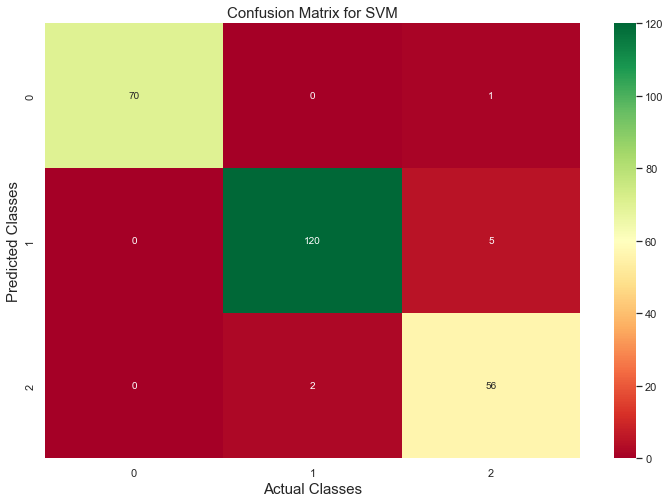

In [405]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_test, sv_test_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [406]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_test, sv_test_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        71
           1       0.98      0.96      0.97       125
           2       0.90      0.97      0.93        58

    accuracy                           0.97       254
   macro avg       0.96      0.97      0.97       254
weighted avg       0.97      0.97      0.97       254



In [358]:
precision_SV, recall_SV, f1_score_SV, support = precision_recall_fscore_support(y_test, sv_test_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV)
print('Recall Score :', '%0.2f' % recall_SV)
print('F1-Score:', '%0.2f' % f1_score_SV)
SV_Acc= accuracy_score(y_test, sv_test_predict)
print('Accuracy Score :','%0.2f' % SV_Acc)

Precision Score : 0.96
Recall Score : 0.97
F1-Score: 0.97
Accuracy Score : 0.97


In [359]:
#SVM on the pca data
svc_model_pca = SVC(C= 4, kernel='rbf', gamma='scale')
svc_model_pca.fit(X_tr, y_tr)

SVC(C=4)

In [360]:
#predicting on train data
sv_tr_predict = svc_model_pca .predict(X_tr)
print("Model Accuracy on train: {0:.4f}".format(metrics.accuracy_score(y_tr, sv_tr_predict)))
print()

Model Accuracy on train: 0.9696



In [361]:
#predicting on test data
sv_te_predict = svc_model_pca .predict(X_te)
print("Model Accuracy on test: {0:.4f}".format(metrics.accuracy_score(y_te, sv_te_predict)))
print()

Model Accuracy on test: 0.9646



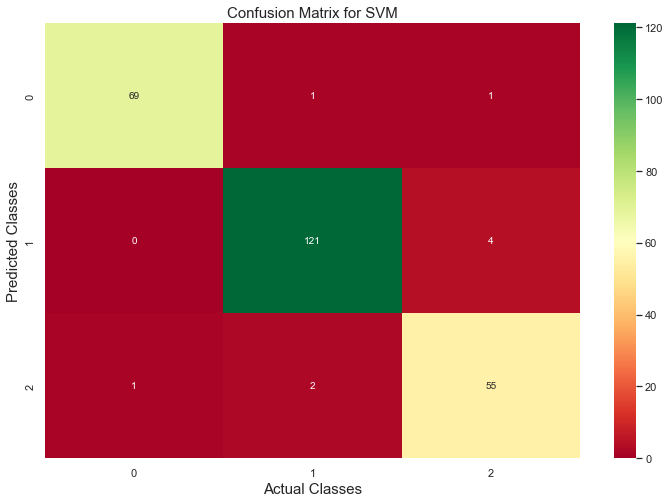

In [362]:
#visualization of confusion matrix in the form of a heatmap
cm= confusion_matrix(y_te, sv_te_predict)
plt.figure(figsize = (12, 8))
sns.heatmap(cm, annot = True, cmap = 'RdYlGn', fmt = 'd')
plt.xlabel('Actual Classes', fontsize = 15)
plt.ylabel('Predicted Classes', fontsize = 15)
plt.title('Confusion Matrix for SVM', fontsize = 15);

In [363]:
#printing classification report
print("Classification Report")
print(metrics.classification_report(y_te, sv_te_predict, labels=[0,1,2]))

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.98      0.97      0.97       125
           2       0.92      0.95      0.93        58

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.97      0.96      0.96       254



In [364]:
precision_SV_pca, recall_SV_pca, f1_score_SV_pca, support_pca = precision_recall_fscore_support(y_te, sv_te_predict,average='macro')
print('Precision Score :', '%0.2f' % precision_SV_pca)
print('Recall Score :', '%0.2f' % recall_SV_pca)
print('F1-Score:', '%0.2f' % f1_score_SV_pca)
SV_Acc_pca= accuracy_score(y_te, sv_te_predict)
print('Accuracy Score :','%0.2f' % SV_Acc_pca)

Precision Score : 0.96
Recall Score : 0.96
F1-Score: 0.96
Accuracy Score : 0.96


### Using Grid Search to tune model parameters

In [408]:
#Grid search to tune model parameters for SVC
from sklearn.model_selection import GridSearchCV
model = SVC()
params = {'C': [0.01, 0.1, 0.5, 1], 'kernel': ['linear', 'rbf']}
model1 = GridSearchCV(model, param_grid=params, verbose=5)
model1.fit(X_train, y_train)
print("Best Hyper Parameters:\n", model1.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .............C=0.01, kernel=linear;, score=0.874 total time=   0.0s
[CV 2/5] END .............C=0.01, kernel=linear;, score=0.840 total time=   0.0s
[CV 3/5] END .............C=0.01, kernel=linear;, score=0.864 total time=   0.0s
[CV 4/5] END .............C=0.01, kernel=linear;, score=0.915 total time=   0.0s
[CV 5/5] END .............C=0.01, kernel=linear;, score=0.780 total time=   0.0s
[CV 1/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 2/5] END ................C=0.01, kernel=rbf;, score=0.513 total time=   0.0s
[CV 3/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 4/5] END ................C=0.01, kernel=rbf;, score=0.517 total time=   0.0s
[CV 5/5] END ................C=0.01, kernel=rbf;, score=0.508 total time=   0.0s
[CV 1/5] END ..............C=0.1, kernel=linear;, score=0.908 total time=   0.0s
[CV 2/5] END ..............C=0.1, kernel=linear;,

In [411]:
from sklearn.model_selection import cross_val_score
#Build the model with the best hyper parameters
model = SVC(C=0.5, kernel="linear")
scores = cross_val_score(model, pca_df, y, cv=10)
print(scores)
print(np.mean(scores))

[0.83529412 0.90588235 0.90588235 0.88235294 0.90588235 0.87058824
 0.85714286 0.89285714 0.92857143 0.89285714]
0.8877310924369748


In [413]:
modellists = []
modellists.append(['Support Vector Classifier without PCA', SV_Acc * 100, recall_SV * 100, precision_SV * 100,f1_score_SV*100])
modellists.append(['Support Vector Classifier with PCA', SV_Acc_pca* 100, recall_SV_pca * 100, precision_SV_pca * 100,f1_score_SV_pca*100])
mdl_df = pd.DataFrame(modellists, columns = ['Model','Accuracy Score of Test Data', 'Recall Score', 'Precision Score','F1 Score'])
mdl_df

,Model,Accuracy Score of Test Data,Recall Score,Precision Score,F1 Score
0,Support Vector Classifier without PCA,96.850394,97.047758,96.227745,96.596702
1,Support Vector Classifier with PCA,96.456693,96.270228,95.939580,96.093811


Bothe the model give more than 90% accuracy on the test data, PCA used only 6 attributes to come up with an accuracy of 90%+ where as the model without pca used all the variables to come up with 90%+ accuracy, the difference can be illustrated even better if the dataset had been cursed with dimensionality, since its 18 variable in the original data the difference is very subtle.